In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from datetime import datetime, date
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country'] == "United States"].copy()

df_US_exploded = df_US.explode("job_skills")

df_US_exploded[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [12]:
skill_stats = df_US_exploded.groupby(["job_skills", "job_title_short"]).size()

skill_stats_count = skill_stats.reset_index(name= "skill_count").sort_values("skill_count", ascending= False)

skill_stats_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [25]:
job_titles = sorted(skill_stats_count['job_title_short'].unique().tolist()[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

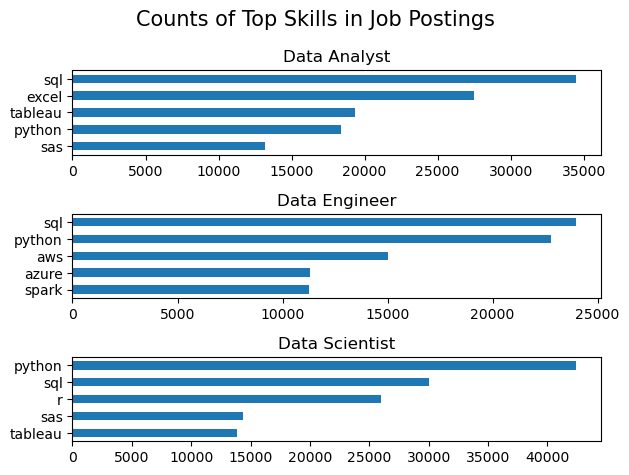

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, title in enumerate(job_titles):
    df_plot = skill_stats_count[skill_stats_count['job_title_short'] == title].head()
    df_plot.plot(kind= "barh", x= "job_skills", y= "skill_count", ax= ax[i], title= title, legend= False)
    ax[i].set_ylabel("")
    ax[i].invert_yaxis()

fig.suptitle("Counts of Top Skills in Job Postings", fontsize= 15)
fig.tight_layout()
plt.show()

In [46]:
df_job_title_count = df_US["job_title_short"].value_counts().reset_index(name= "jobs_total")

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [ ]:
df_merged = pd.merge(left= skill_stats_count, right= df_job_title_count, on= "job_title_short", how= "left")

df_merged['skill_pct'] = (df_merged["skill_count"]/df_merged["jobs_total"])*100

df_merged

,job_skills,job_title_short,skill_count,jobs_total,skill_pct
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


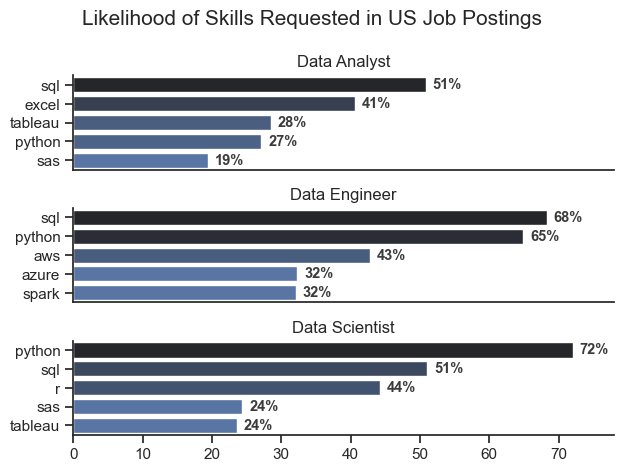

In [180]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style= "ticks")

for i, title in enumerate(job_titles):
    df_plot = df_merged[df_merged['job_title_short'] == title].head()
    # df_plot.plot(kind= "barh", x= "job_skills", y= "skill_pct", ax= ax[i], title= title, legend= False)
    sns.barplot(data= df_plot, x= "skill_pct", y= "job_skills", ax= ax[i], hue= "skill_pct", palette= "dark:b_r")
    sns.despine(ax= ax[i])
    ax[i].set_title(title)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 78)
    if i != (len(job_titles)-1):
        ax[i].set_xticks([])

    for n, v in enumerate(df_plot['skill_pct']):
        ax[i].text(v+1, n, f"{v:.0f}%", va= 'center', fontdict= dict(fontsize= 10.5, fontweight= 'bold', alpha= 0.9))

fig.suptitle("Likelihood of Skills Requested in US Job Postings", fontsize= 15)
fig.tight_layout()
plt.show()

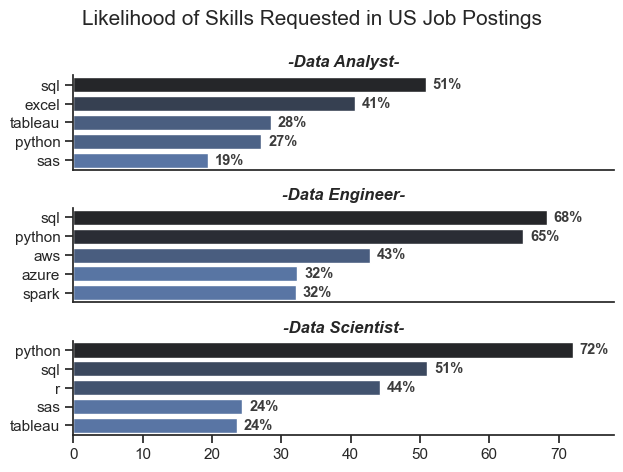

In [189]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style= "ticks")

for i, title in enumerate(job_titles):
    df_plot = df_merged[df_merged['job_title_short'] == title].head()
    # df_plot.plot(kind= "barh", x= "job_skills", y= "skill_pct", ax= ax[i], title= title, legend= False)
    sns.barplot(data= df_plot, x= "skill_pct", y= "job_skills", ax= ax[i], hue= "skill_pct", palette= "dark:b_r")
    sns.despine(ax= ax[i])
    ax[i].set_title(f"-{title}-", fontweight= "bold", fontstyle= "italic")
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 78)
    if i != (len(job_titles)-1):
        ax[i].set_xticks([])

    for n, v in enumerate(df_plot['skill_pct']):
        ax[i].text(v+1, n, f"{v:.0f}%", va= 'center', fontdict= dict(fontsize= 10.5, fontweight= 'bold', alpha= 0.9))

fig.suptitle("Likelihood of Skills Requested in US Job Postings", fontsize= 15)
fig.tight_layout()
plt.show()